In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


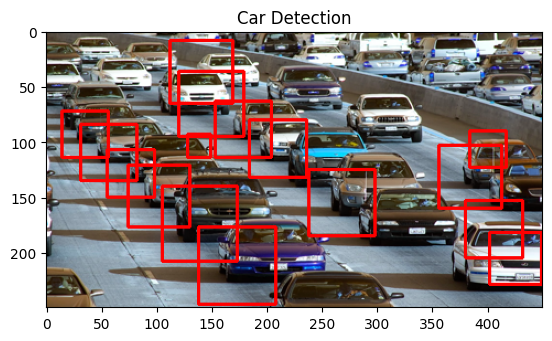

Number of cars detected: 16


In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image


car_cascade = cv2.CascadeClassifier('cars.xml')

image = Image.open(requests.get('https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/master/pass/highway-traffic.jpg', stream=True).raw)

image = image.resize((450, 250))


image_arr = np.array(image)


gray = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)

cars = car_cascade.detectMultiScale(gray, 1.1, 1)


car_count = 0


for (x, y, w, h) in cars:
    cv2.rectangle(image_arr, (x, y), (x + w, y + h), (0, 0, 255), 2)
    car_count += 1

plt.imshow(cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB))  
plt.title("Car Detection")
plt.show()

print("Number of cars detected:", car_count)


In [ ]:
import cv2
face_detector = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
cape = cv2.VideoCapture('vid.mp4')
if not cape.isOpened():
    print("تعذر فتح الفديو")
    exit()

color = (255, 0, 0)
thickness = 5

while True:
    ret, img = cape.read()

    if not ret:
        print("تعذر قراءة الاطار")
        break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
         cv2.rectangle(img, (x, y), (x + w, y + h), color, thickness)

    cv2.imshow('vid', img)

    cv2.waitKey(30)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cape.release()
cv2.destroyAllWindows()   
